In [1]:
from sklearn import preprocessing # Biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulacao de arrays Numpy
from matplotlib.colors import ListedColormap # Lista de cores para plotagens
import pandas as pd
from google.colab import drive
# Montando o Google Drive na mesma conta do Google Colab
drive.mount('/content/drive')

# Classe Adaline
class Adaline:
    # Construtor com informações setadas com o número de épocas máxima (epoch) e taxa de aprendizagem (eta)
    def __init__(self, eta = 0.001, epoch = 1000, goal = 0.000001):
        self.eta = eta # Taxa de aprendizagem, utilizada para impulsionar o movimento do hiperplano na separação de classes
        self.epoch = epoch # Determinação máxima de épocas no ajuste da RNA
        self.epochs = 0 # Contabilização do número de épocas no treinamento
        self.errorsTests = 0 # Utilizado para contabilizar a quantidade de amostras classificadas incorretamente nos testes da rede já treinada
        self.goal = goal # Definição do objetivo com parada definida no treinamento que é comparado com o cálculo do erro quadrático da época anterior com a atual

    # Método para treinamento da rede
    def fit(self, X, y):
        # Inicialização dos pesos randomicamente - shape retorna a dimensão das entradas da RNA
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0
        cont = 1

        for _ in range(self.epoch):
            # Obtenção da saída da rede baseada nos pesos sinápticos ajustados
            output = self.activation_function(X) # Valor do u
            # y é a saída desejada e output é a saída calculada, obtem-se um valor real
            error = y - output # verificação do erro

            # Ajuste do limiar de ativação
            self.weight_[0] += self.eta * sum(error)
            # Ajuste dos pesos sinápticos - Minimização do erro quadrático médio com a aplicação do gradiente do erro E(w)
            self.weight_[1:] += self.eta * X.T.dot(error) # dot efetua a multiplicação de matrizes, T calcula a transposta de X para poder efetuar a multiplicação segundo a regra - https://acervolima.com/diferenca-entre-a-operacao-numpy-dot-e-em-python/

            # Cálculo do erro quadrático E(w)
            self.cost = 1./2 * sum((error**2))

            # Armazena em mseP o mse da época anterior para poder comparar com o atual
            mseP = self.mse

            # Cálculo do erro quadrático médio mse(w) da época atual
            self.mse = 1./X.shape[0] * sum((error**2))

            # Atualização do número de épocas
            self.epochs += 1

            # Permite verificar a diferença do erro somente na segunda passagem
            if self.epochs > 1:
                # Verfica se a diferença entre o erro da época anterior com a atual é menor que o objetivo pré-determinado
                if  mseP-self.mse < self.goal:
                    break

            # Armazena os erros quadráticos e os erros quadráticos médios em listas
            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self

    def net_input(self, X):
        # Calcula a entrada da rede por meio de um produto escalar (dot) dos valores de entrada com os pesos (Combinador Linear)
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        # Função de ativação que recebe o retorno do cálculo do método net_input
        return self.net_input(X)

    def predict(self, X, y_d): # y_d = saída desejada utilizada para verificar a acurácia no teste
        # Obtenção da saída calculada baseada no conjunto de entradas calculado com os pesos ajustados obtenção final pautada na função de ativação
        y = np.where(self.activation_function(X) >= 0.0, 1, -1)

        # Verificação se a amostra testada apresentou erro na classificação
        if y != y_d:
            self.errorsTests = self.errorsTests + 1
            return 'Erro'
        return 'Acerto'

Mounted at /content/drive


In [2]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/valvulas.csv")

# Separando a coluna da classe do dataset
y = df.iloc[:, 4].values

# Separando as colunas com as variáveis do dataset para determinar os inputs da RNA
X = df.iloc[:, [0,1,2,3]].values

# Normalização dos dados sklearn - dados entre 0 e 1 - https://pt.linux-console.net/?p=5847
#scaler = preprocessing.MinMaxScaler()
#X = scaler.fit_transform(X)

# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

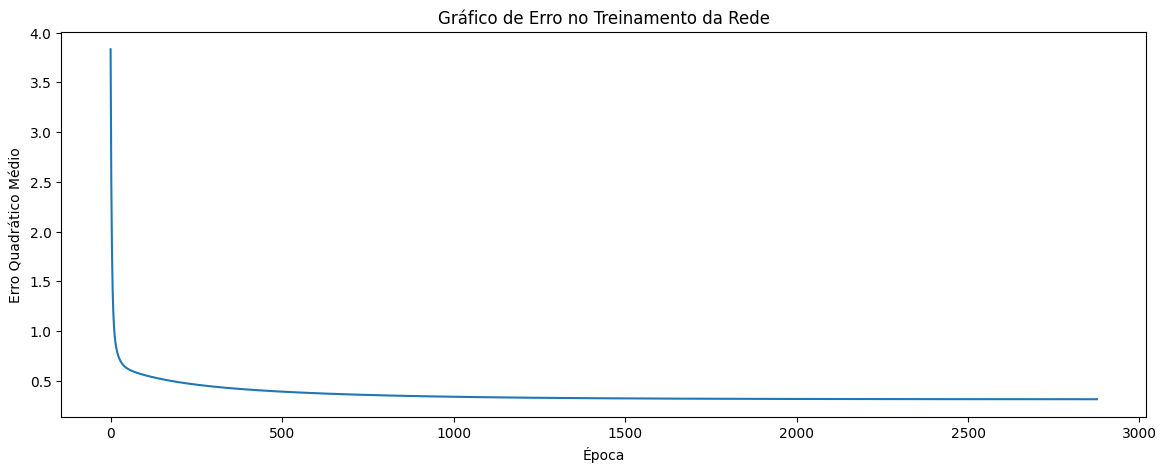

In [3]:
## Treinando a RNA com dados separados em 70% do dataset e validando com 30%

# Criando as fronteiras de decisão com Adaline
rede = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede.fit(X_train, y_train)

# Plotando o gráfico da descida do gradiente no processo de treinamento
plt.figure(figsize=(14,5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro Quadrático Médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de Erro no Treinamento da Rede')
plt.show()

In [4]:
# Testando a rede em lote de amostras
print("\nClassificações dos testes com amostras não apresentadas no treinamento:")

nTests = len(y_test)
for i in range(nTests):
    rede.predict(X_test[i,:], y_test[i])

print("Acurácia: ", (nTests-rede.errorsTests)/nTests*100, "%")
print("Quantidade de erros no teste em lote: ", rede.errorsTests)
print("Número de épocas do treinamento da RNA: ", rede.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede.weight_[0], "Pesos das entradas = ", rede.weight_[1:])


Classificações dos testes com amostras não apresentadas no treinamento:
Acurácia:  90.9090909090909 %
Quantidade de erros no teste em lote:  1
Número de épocas do treinamento da RNA:  2878
Erro quadrático médio final (MSE - Eqm(w)):  0.3154073062479318
Erro quadrático final (QE - E(w) - Custo):  3.6271840218512157
Vetor de pesos finais da RNA treinada - Limiar =  1.5653125624533941 Pesos das entradas =  [ 1.44084422  1.57768179 -0.33420372 -1.09323888]


In [38]:
## Treinando novamente com o dataset completo e validando com um novo dataset específico para teste

# Criando as fronteiras de decisão com Adaline
rede2 = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede2.fit(X, y)

# Caminho do dataset no Google Drive que será carregado em df
dft = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/valvulasTestes.csv")

# Separando a coluna da classe do dataset
yt = dft.iloc[:, 4].values

# Separando as colunas com as variáveis do dataset para determinar os inputs da RNA
Xt = dft.iloc[:, [0,1,2,3]].values

nTests = len(yt)

for i in range(nTests):
    print(rede2.predict(Xt[i,:], yt[i]))

print("Quantidade de erros no teste em lote: ", rede2.errorsTests)
print("Acurácia: ", (nTests-rede2.errorsTests)/nTests*100, "%")
print("Número de épocas do treinamento da RNA: ", rede2.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede2.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede2.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede2.weight_[0], "Pesos das entradas = ", rede2.weight_[1:])

Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Acerto
Quantidade de erros no teste em lote:  0
Acurácia:  100.0 %
Número de épocas do treinamento da RNA:  1949
Erro quadrático médio final (MSE - Eqm(w)):  0.3095704305474387
Erro quadrático final (QE - E(w) - Custo):  5.262697319306458
Vetor de pesos finais da RNA treinada - Limiar =  1.7725811035721106 Pesos das entradas =  [ 1.30224347  1.6252486  -0.42354429 -1.1695476 ]
